#KELOMPOK 22
#10123455-FIRZA ALIYAH
#10123239-BAYU PRAMUDYA PUTRA
#11123096-RAIHAN KAMIL

# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memasukkan library yang akan kamu gunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Mengambil file .csv dari Google Drive kamu.

In [ ]:
df = pd.read_csv('/content/housing_data.csv', sep=',')

## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
#Deteksi Outlier
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

price: 15 outliers
area: 12 outliers
bedrooms: 12 outliers
bathrooms: 1 outliers
stories: 41 outliers
mainroad: 77 outliers
guestroom: 97 outliers
basement: 0 outliers
hotwaterheating: 25 outliers
airconditioning: 0 outliers
parking: 12 outliers
prefarea: 128 outliers


In [ ]:
#Konversi kolom biner ke 0/1
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
binary_map = {'yes': 1, 'no': 0}
df[binary_cols] = df[binary_cols].applymap(lambda x: binary_map.get(x, x))

<ipython-input-19-ceb35b93fad7>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: binary_map.get(x, x))


In [ ]:
#Log transformasi pada 'price' dan 'area'
df['price'] = np.log1p(df['price'])
df['area'] = np.log1p(df['area'])

In [ ]:
#Definisikan kolom numerik dan kategorikal
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['furnishingstatus']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_transformed = preprocessor.fit_transform(X)

In [ ]:
encoded_cat_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
all_feature_names = numerical_cols + encoded_cat_features + binary_cols

In [ ]:
X_processed = pd.DataFrame(X_transformed, columns=all_feature_names)

In [ ]:
print("Data setelah preprocessing:")
print(X_processed.head())

Data setelah preprocessing:
       area  bedrooms  bathrooms   stories   parking  \
0  1.119332  1.403419   1.421812  1.378217  1.517692   
1  1.593323  1.403419   5.405809  2.532024  2.679409   
2  1.859255  0.047278   1.421812  0.224410  1.517692   
3  1.146285  1.403419   1.421812  0.224410  2.679409   
4  1.119332  1.403419  -0.570187  0.224410  1.517692   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  mainroad  \
0                              0.0                           0.0       1.0   
1                              0.0                           0.0       1.0   
2                              1.0                           0.0       1.0   
3                              0.0                           0.0       1.0   
4                              0.0                           0.0       1.0   

   guestroom  basement  hotwaterheating  airconditioning  prefarea  
0        0.0       0.0              0.0              1.0       1.0  
1        0.0       0.0      

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    object 
dtypes: float64(2), int64(10), object(1)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,8.912069,4,2,3,1,0,0,0,1,2,1,furnished
1,16.321037,9.100637,4,4,4,1,0,0,0,1,3,0,furnished
2,16.321037,9.206433,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,16.318175,8.922792,4,2,2,1,0,1,0,1,3,1,furnished
4,16.250001,8.912069,4,1,2,1,1,1,0,1,2,0,furnished


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

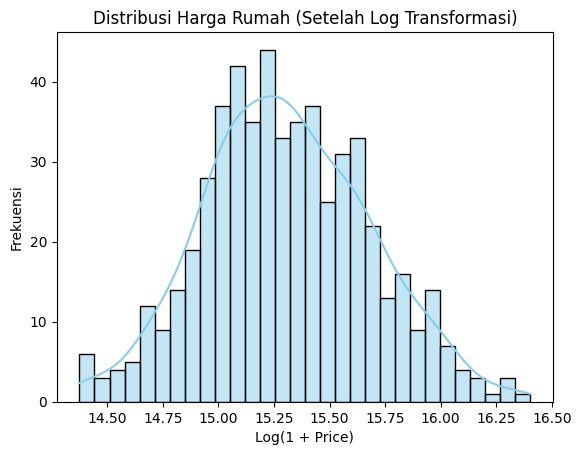

In [ ]:
#Distribusi Harga Rumah
sns.histplot(df['price'], bins=30, kde=True, color= 'skyblue')
plt.title('Distribusi Harga Rumah (Setelah Log Transformasi)')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Frekuensi')
plt.show()

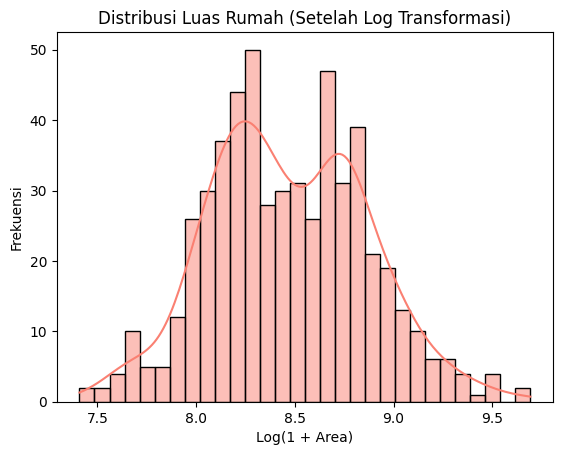

In [ ]:
#Distribusi Luas Rumah (area)
sns.histplot(df['area'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Luas Rumah (Setelah Log Transformasi)')
plt.xlabel('Log(1 + Area)')
plt.ylabel('Frekuensi')
plt.show()

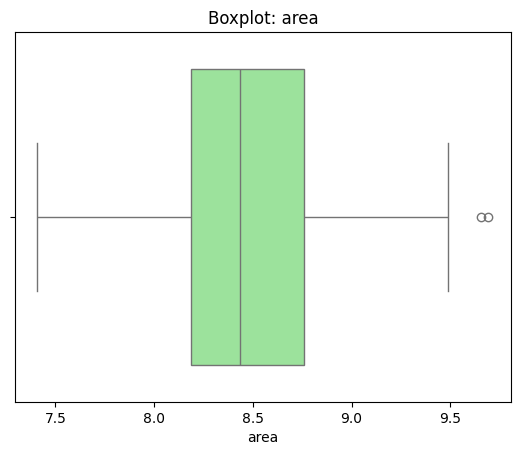

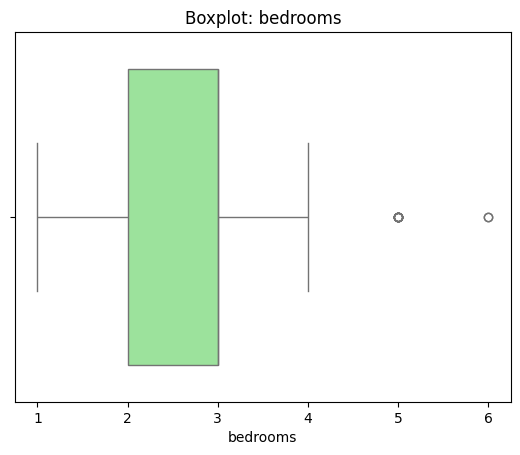

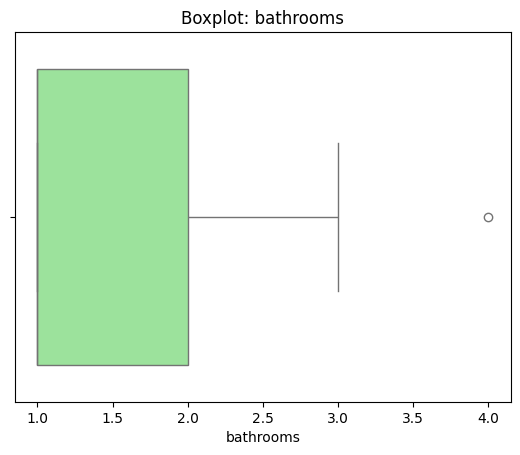

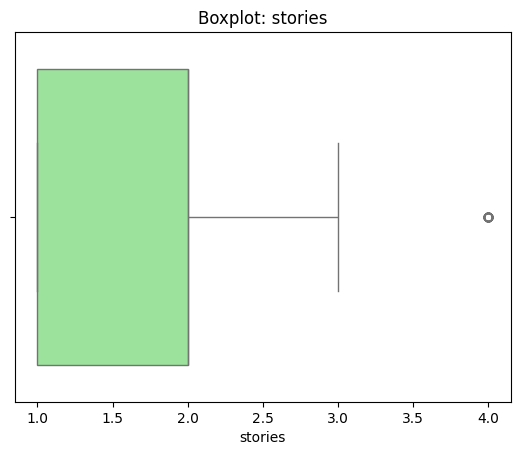

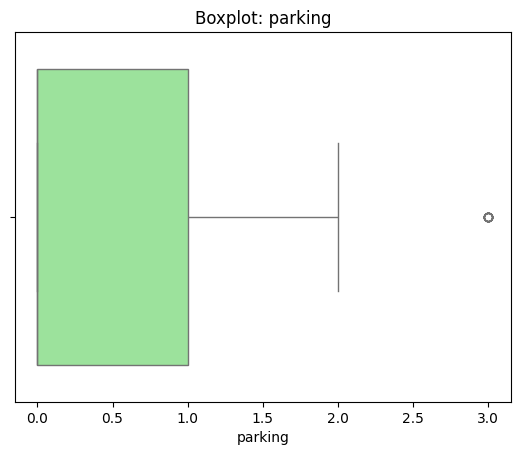

In [ ]:
#Boxplot untuk Menemukan Outlier Numerik
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot: {col}')
    plt.show()

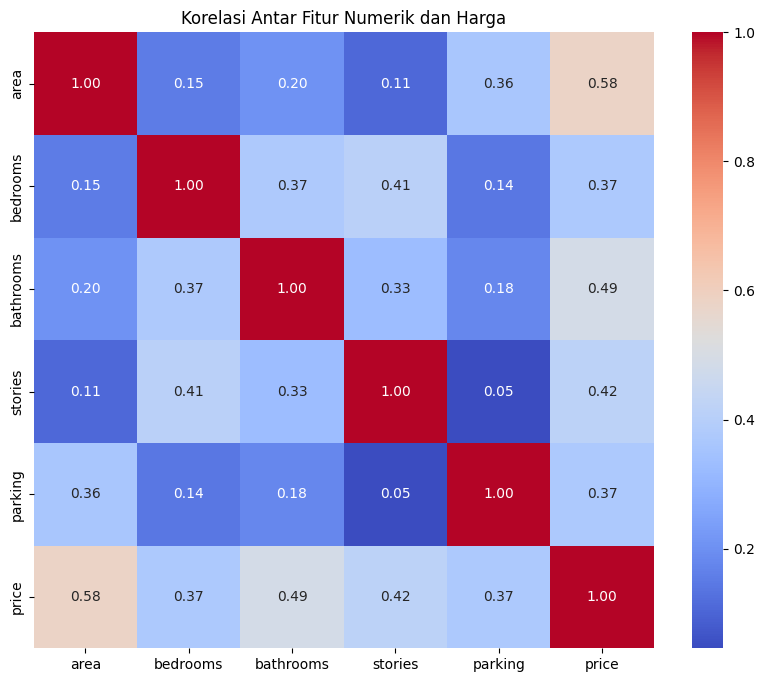

In [ ]:
#Heatmap Korelasi antar Fitur Numerik
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols + ['price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik dan Harga')
plt.show()

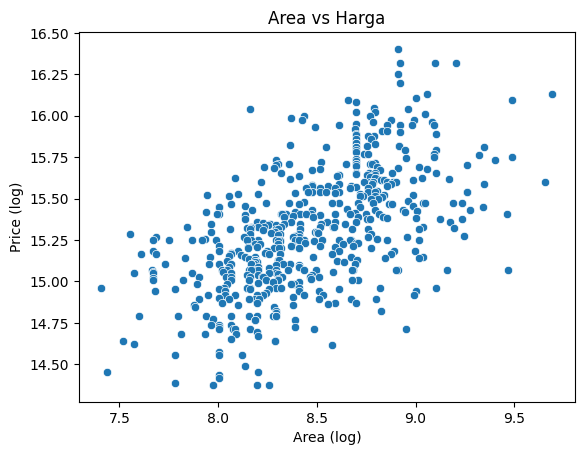

In [ ]:
# Hubungan Area vs Harga Rumah
sns.scatterplot(x=df['area'], y=df['price'])
plt.title('Area vs Harga')
plt.xlabel('Area (log)')
plt.ylabel('Price (log)')
plt.show()


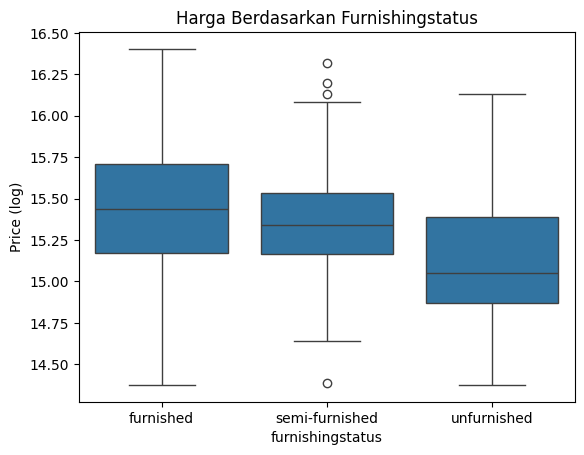

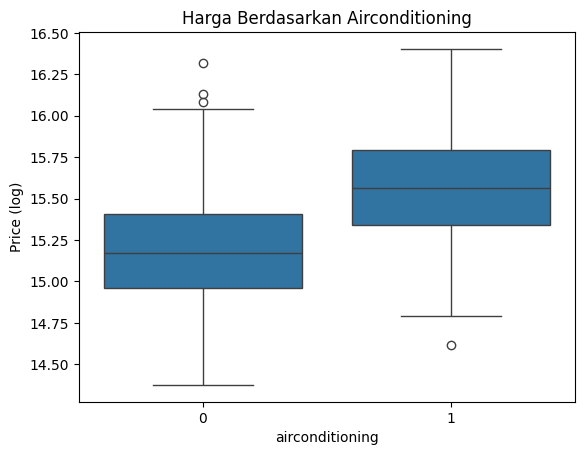

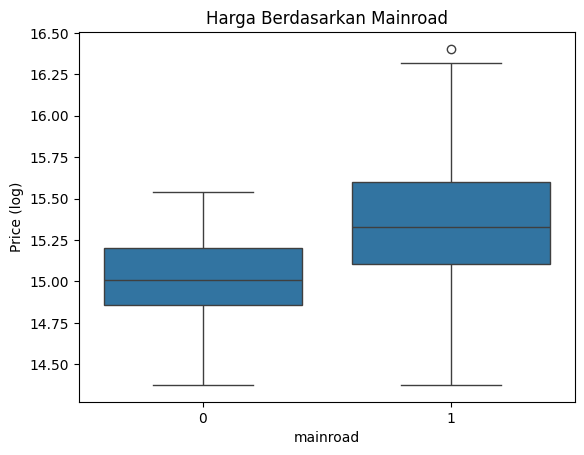

In [ ]:
#Boxplot Harga Berdasarkan Fitur Kategorikal
cat_cols = ['furnishingstatus', 'airconditioning', 'mainroad']

for col in cat_cols:
    plt.figure()
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'Harga Berdasarkan {col.capitalize()}')
    plt.ylabel('Price (log)')
    plt.show()

<ipython-input-47-ae108645e1b8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bathrooms', y='price', data=df, palette='mako')


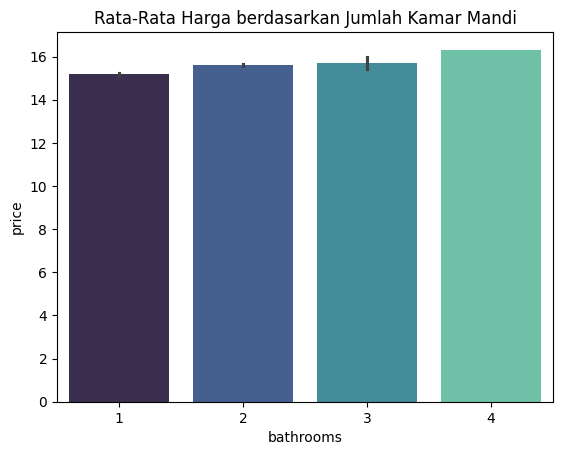

In [ ]:
#Barplot Rata-Rata Harga Berdasarkan Jumlah Kamar Mandi
sns.barplot(x='bathrooms', y='price', data=df, palette='mako')
plt.title('Rata-Rata Harga berdasarkan Jumlah Kamar Mandi')
plt.show()

## Data Preparation

Memisahkan data training dan testing

In [ ]:
#Split Data Secara Acak tapi Konsisten
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [ ]:
# Cek Ukuran Data
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing :", X_test.shape)

Ukuran data training: (436, 13)
Ukuran data testing : (109, 13)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [ ]:
# Gabungkan X_processed dan y untuk korelasi
df_corr = X_processed.copy()
df_corr['price'] = y

In [ ]:
corr_matrix = df_corr.corr(numeric_only=True)

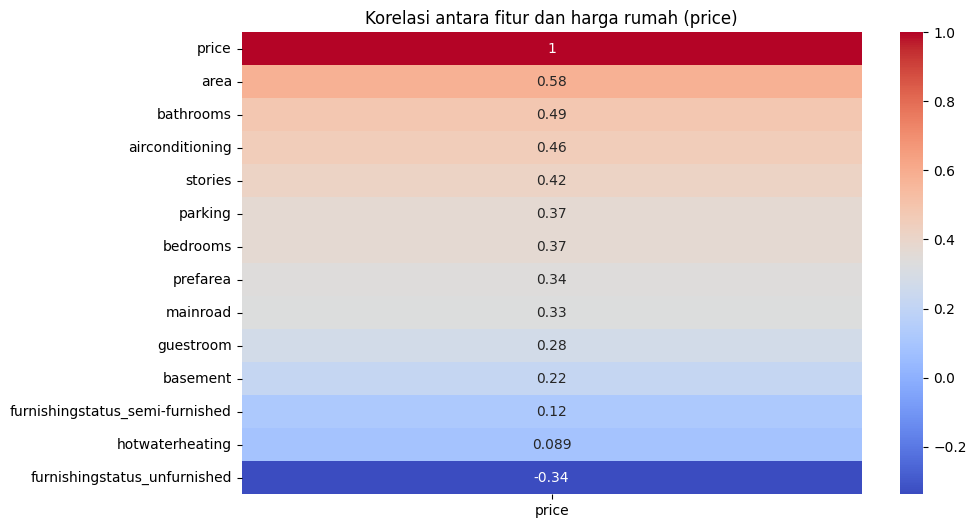

In [ ]:
# Korelasi hanya fitur numerik
corr_matrix = df_corr.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi antara fitur dan harga rumah (price)')
plt.show()

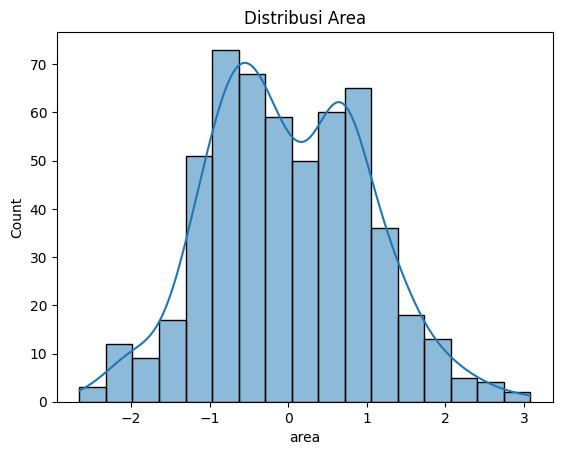

In [ ]:
# Contoh distribusi area
sns.histplot(df_corr['area'], kde=True)
plt.title("Distribusi Area")
plt.show()

In [ ]:
# Buat model
model = LinearRegression()

In [ ]:
# Latih model dengan seluruh fitur
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi hasil
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Root Mean Squared Error (RMSE): 0.249
R-squared (R²): 0.678


In [ ]:
selected_features = ['area', 'bedrooms', 'bathrooms']
X_sub = X_processed[selected_features]

In [ ]:
X_train_sub, X_test_sub, y_train, y_test = train_test_split(
    X_sub, y, test_size=0.2, random_state=42
)

In [ ]:
# Bangun model
model = LinearRegression()
model.fit(X_train_sub, y_train)
y_pred = model.predict(X_test_sub)

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"[Subset: {selected_features}]")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

[Subset: ['area', 'bedrooms', 'bathrooms']]
RMSE: 0.315
R²: 0.486


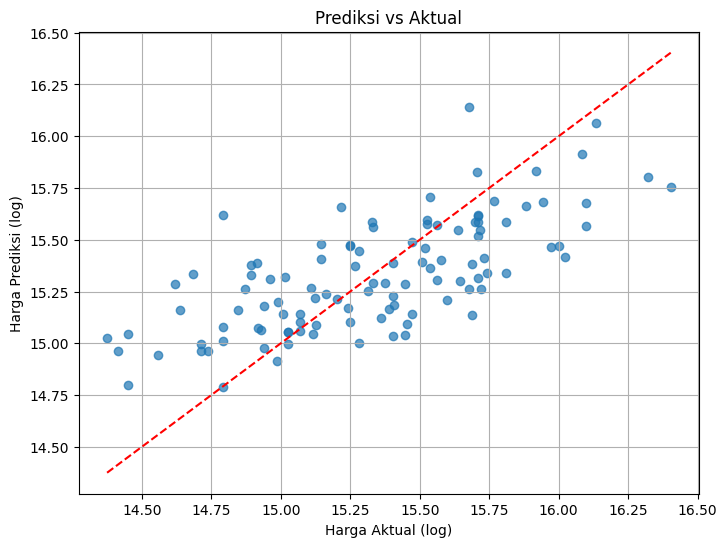

In [ ]:
#Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal
plt.xlabel('Harga Aktual (log)')
plt.ylabel('Harga Prediksi (log)')
plt.title('Prediksi vs Aktual')
plt.grid(True)
plt.show()

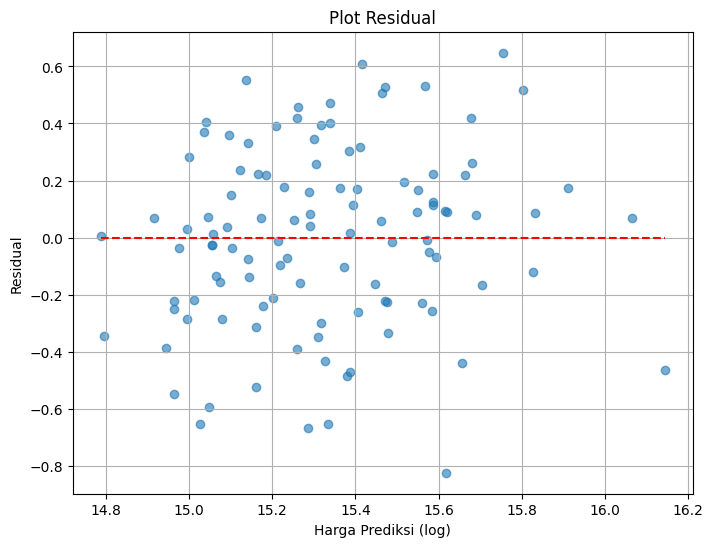

In [ ]:
#Plot Residual (error prediksi)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Harga Prediksi (log)')
plt.ylabel('Residual')
plt.title('Plot Residual')
plt.grid(True)
plt.show()

In [ ]:
#Interpretasi Hasil Evaluasi
📌 A. Interpretasi Metrik
RMSE (Root Mean Squared Error) mengukur rata-rata kesalahan prediksi. Semakin kecil → semakin baik.

R² (R-squared) menunjukkan seberapa besar variasi price bisa dijelaskan oleh fitur.

R² = 1 → prediksi sempurna.

R² > 0.7 → model cukup baik (tergantung konteks).

R² < 0.5 → model kurang baik, perlu fitur tambahan atau transformasi.

In [ ]:
📌 B. Interpretasi Plot
Scatter plot Prediksi vs Aktual:
Jika titik-titik mendekati garis merah putus-putus (ideal), model baik.

Residual plot:

Sebaran residual acak = bagus.

Pola (misal membentuk parabola) = model bias, mungkin perlu model non-linier.